# Graphing examples
## Import isotherms

First import the example data by running the import notebook

In [1]:
%run import.ipynb
import matplotlib.pyplot as plt

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


## Isotherm display

Example of using the Isotherm plotting function.

Experimental isotherm
Material: MCM-41
Batch: Test
Adsorbate used: N2
Isotherm temperature: 77.355K
Isotherm type: Isotherme
Machine: Triflex
User: PI
Activation temperature: 150.0°C
Units: 
Unit for loading: mmol/g
Unit for pressure: bar
Other properties: 



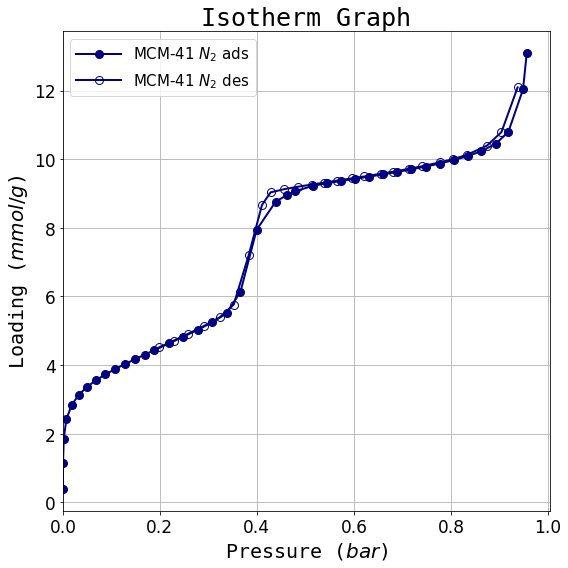

In [2]:
isotherm = isotherms_n2_77k[0]
isotherm.print_info()

## Isotherm plotting and comparison

Several examples will now follow

- A logarithmic isotherm graph comparing the adsorption branch of two isotherms up to 1 bar.
The isotherms are measured on the same material and batch, but at different temperatures, 
so we want this information to be visible in the legend.
We also want the loading to be displayed in *cm3 STP*.

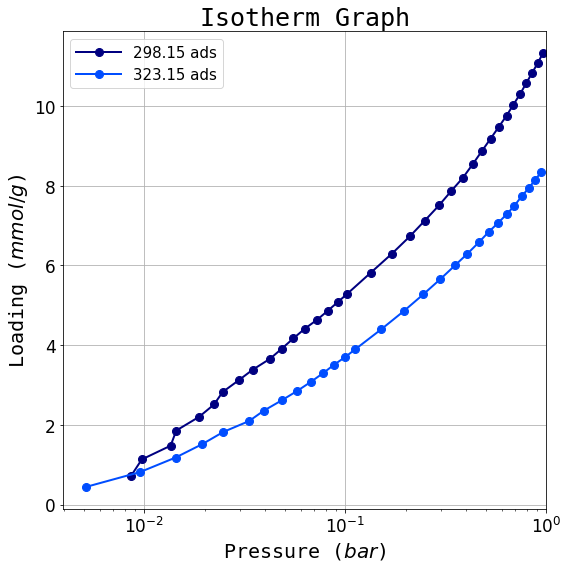

In [3]:
pygaps.plot_iso(
            [isotherms_isosteric[0], isotherms_isosteric[1]],
            branch = ['ads'],
            logx = True,
            x_range=(None,1),
            legend_list=['t_exp'],
            unit_loading='cm3 STP'
        )
plt.show()

- A black and white full scale graph of both adsorption and desorption branches of an
 isotherm, saving it to the local directory for a publication. The result file is found [here](novel.png).

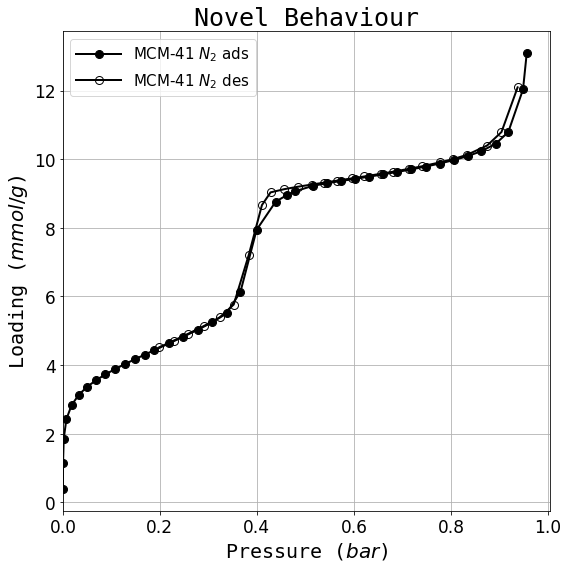

In [4]:
import os

path = os.path.join(os.getcwd(), 'novel')

pygaps.plot_iso(
            [isotherms_n2_77k[0]],
            branch = ['ads', 'des'],
            color=False,
            save=True,
            fig_title='Novel Behaviour',
            path=path,
        )

plt.show()

- A graph which plots the both the loading and enthalpy as a function of loading, for a
 calorimetry experiment.
 We want the legend to appear at the bottom of the graph and, due to error cumulation,
 to limit the maximum enthalpy displayed at 40 kJ.

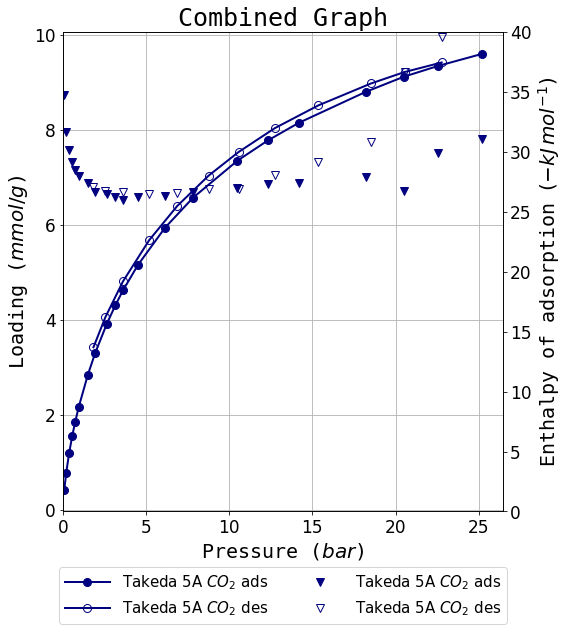

In [5]:
pygaps.plot_iso(
            [isotherms_calorimetry[1]],
            plot_type='combined',
            secondary_key='enthalpy',
            legend_bottom=True,
            y2_range=(0,40),
        )
plt.show()

- A comparison graph of all the nitrogen isotherms, with both branches shown.

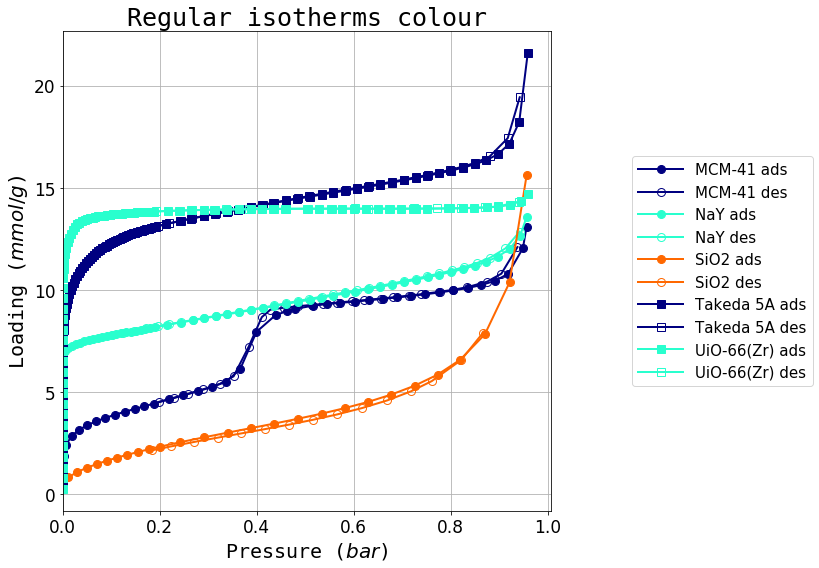

In [6]:
pygaps.plot_iso(isotherms_n2_77k, plot_type='isotherm', branch=['ads', 'des'],
                fig_title="Regular isotherms colour", legend_list=['sample_name'])
plt.show()

- A black and white version of the same graph, but with the pressure being in relative mode

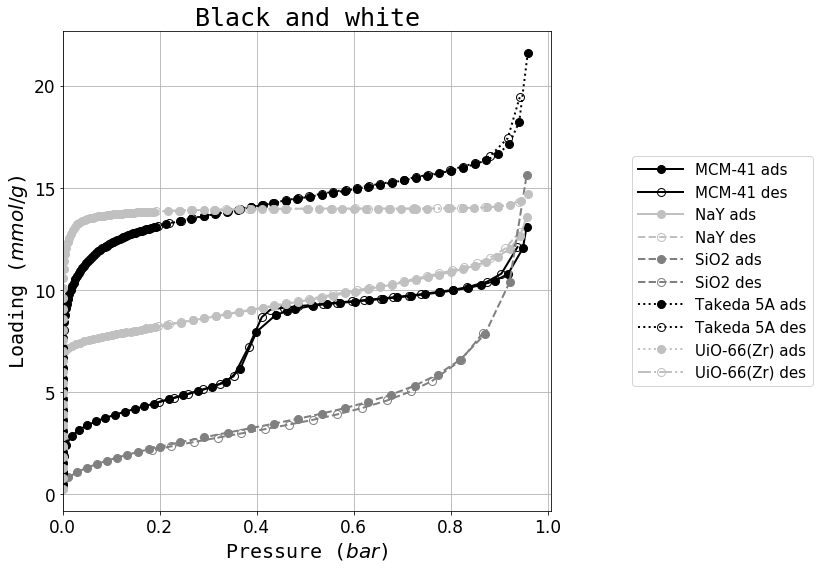

In [7]:
pygaps.plot_iso(isotherms_n2_77k, plot_type='isotherm', branch=['ads', 'des'],
               color=False, fig_title="Black and white", legend_list=['sample_name'],
               mode_pressure='relative')
plt.show()

- Only some ranges selected for display from all the isotherms

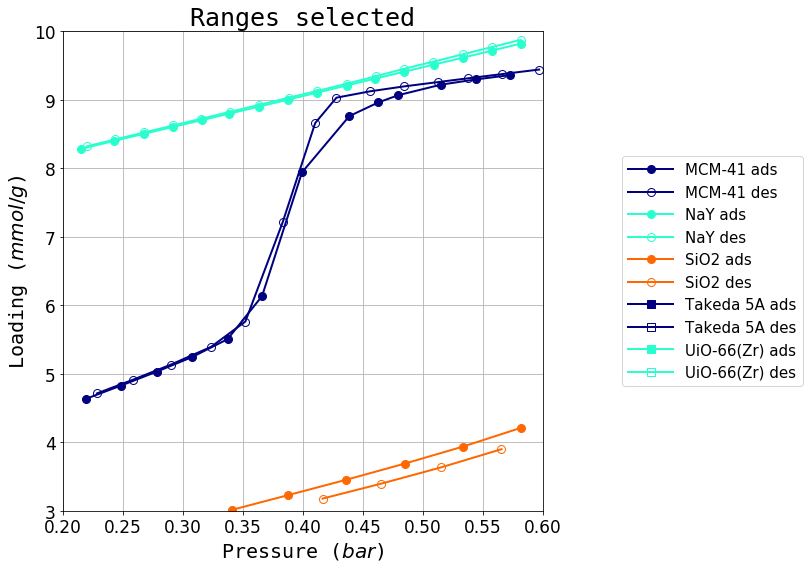

In [8]:
x_range = (0.2, 0.6)
y1_range = (3, 10)

pygaps.plot_iso(isotherms_n2_77k, plot_type='isotherm', branch=['ads', 'des'],
                x_range=x_range, y1_range=y1_range, 
                fig_title="Ranges selected", legend_list=['sample_name'])
plt.show()

- The isosteric pressure isotherms, in relative pressure mode and displayed in cm3 STP

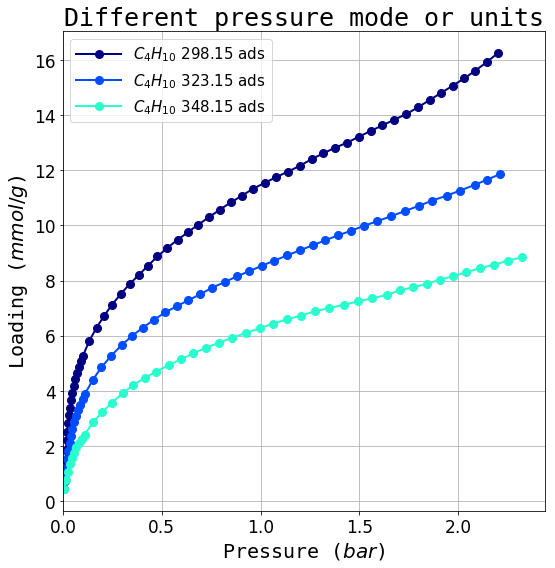

In [9]:
fig_title = "Different pressure mode or units"
mode_pressure = 'relative'
unit_loading = 'cm3 STP'

pygaps.plot_iso(isotherms_isosteric, plot_type='isotherm', branch=['ads'],
                mode_pressure=mode_pressure, unit_loading=unit_loading, 
                fig_title=fig_title, legend_list=['adsorbate', 't_exp'])
plt.show()

- Only desorption branch of some isotherms, showing the user who recorded the isotherms on the graph

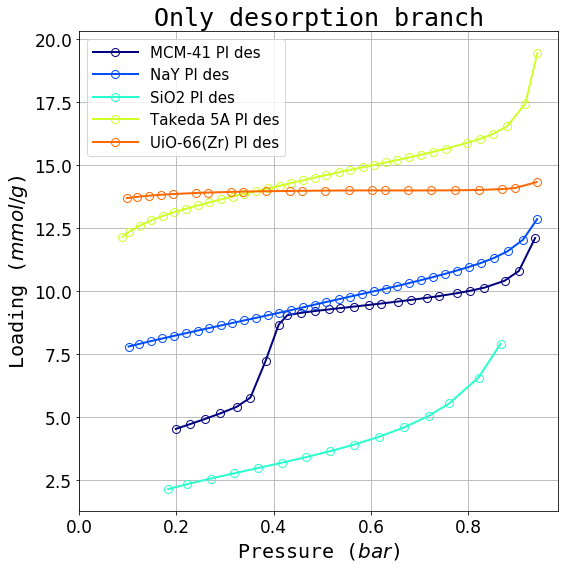

In [10]:
fig_title = "Only desorption branch"

pygaps.plot_iso(isotherms_n2_77k, plot_type='isotherm', branch=['des'],
                fig_title=fig_title, legend_list=['sample_name', 'user'])
plt.show()